In [161]:

import pandas as pd
from scipy.interpolate import lagrange,CubicSpline
from scipy import optimize
import  numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#Tarea 5
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2
t = np.linspace(0,9,1000)
Params = (alpha, v0, b, u,g)  #Parametros en tupla.

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  
  x = (u * np.cos(alpha))*t + 1/b *(v0*np.cos(theta)- u*np.cos(alpha))*(1 - np.exp(-b*t))
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):
  y = 1/b * (g/b + v0*np.sin(theta) - u*np.sin(alpha))*(1-np.exp(-b*t)) -(g/b - u*np.sin(alpha))*t
  return y

x_ = pos_x(t, theta, alpha, v0, b, u,g)

y_ = pos_y(t, theta, alpha, v0, b, u,g)


In [106]:
dicc = {'X':x_, 'Y':y_, 'Tiempo':t}
df = pd.DataFrame(dicc)
df

,X,Y,Tiempo
0,0.000000,0.000000,0.000000
1,0.382073,0.381736,0.009009
2,0.763852,0.762505,0.018018
3,1.145338,1.142308,0.027027
4,1.526530,1.521144,0.036036
...,...,...,...
995,254.321215,-34.439985,8.963964
996,254.467647,-34.833973,8.972973
997,254.613892,-35.228580,8.981982
998,254.759949,-35.623804,8.990991


Text(0, 0.5, 'X')

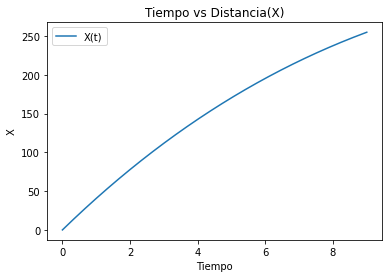

In [107]:
plt.plot(t, df.X, label = 'X(t)')
plt.title('Tiempo vs Distancia(X)')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('X')

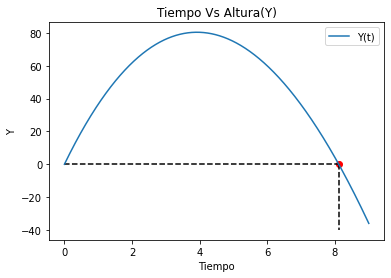

In [108]:
gfunc = lambda t: 1/b * (g/b + v0*np.sin(theta) - u*np.sin(alpha))*(1-np.exp(-b*t)) / (g/b - u*np.sin(alpha))
x0 = 4
root = optimize.fixed_point(gfunc,4)


plt.plot(t, df.Y, label = 'Y(t)')
plt.title('Tiempo Vs Altura(Y)')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Y')
plt.hlines(0,0,root, linestyle = 'dashed')
plt.vlines(root,0,-40, linestyle = 'dashed')
plt.scatter(root,0, color = 'r', label = 'tiempo recorrido')

Text(0, 0.5, 'Altura(Y)')

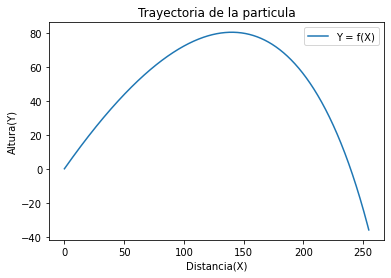

In [109]:
plt.plot(df.X, df.Y, label = 'Y = f(X)')
plt.title('Trayectoria de la particula')
plt.legend()
plt.xlabel('Distancia(X)')
plt.ylabel('Altura(Y)')


In [110]:
#encontrar el 0 de Y
#Y(t) = 0
gfunc = lambda t: 1/b * (g/b + v0*np.sin(theta) - u*np.sin(alpha))*(1-np.exp(-b*t)) / (g/b - u*np.sin(alpha))
x0 = 4
root = optimize.fixed_point(gfunc,4)
print(root)

8.111627022095622


In [111]:
#hallar el alcance máximo
t= root

def pos_x(t, theta, alpha, v0, b, u,g):
  
  x = (u * np.cos(alpha))*t + 1/b *(v0*np.cos(theta)- u*np.cos(alpha))*(1 - np.exp(-b*t))
  return x

max_distance = pos_x(t, theta, alpha, v0, b, u,g)
max_distance



239.60614945520788

In [147]:
theta_grados = np.linspace(10,90,17)
theta_grados

array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
       75., 80., 85., 90.])

[0.17453293 0.26179939 0.34906585 0.43633231 0.52359878 0.61086524
 0.6981317  0.78539816 0.87266463 0.95993109 1.04719755 1.13446401
 1.22173048 1.30899694 1.3962634  1.48352986 1.57079633]
[350.71236132 343.15783482 332.66211322 319.3050753  303.18837618
 284.43467367 263.18669478 239.60614946 213.87249988 186.18159467
 156.74417833 125.78428738  93.53754527  60.2493692   26.17310227
  -8.43191454 -43.30231617]


Text(0, 0.5, 'X')

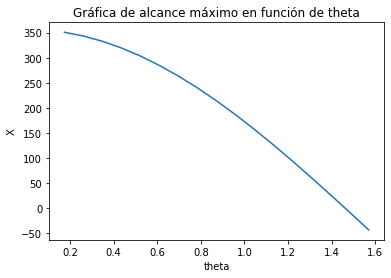

In [148]:
#gráfica
theta = np.deg2rad(np.linspace(10,90,17))
print(theta)
max_distance = pos_x(t, theta, alpha, v0, b, u,g)
print(max_distance)

plt.plot(theta, max_distance)
plt.title('Gráfica de alcance máximo en función de theta')
plt.xlabel('theta')
plt.ylabel('X')

[350.71236166 343.15783545 332.66211401 319.30507906 303.18840451
 284.43481776 263.18724565 239.60788655 213.87726684 186.1933591
 156.77085989 125.84074389  93.65022312  60.46323617  26.56155616
  -7.75348491 -42.15884055]


Text(0, 0.5, 'X')

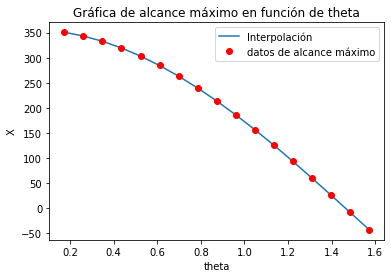

In [149]:
#interpolacion
poly = lagrange(theta, max_distance)
print(poly(theta))
#grafica del polinomio
plt.plot(theta,poly(theta), label = 'Interpolación')

plt.plot(theta, max_distance,'ro',label='datos de alcance máximo')
plt.legend()
plt.title('Gráfica de alcance máximo en función de theta')
plt.xlabel('theta')
plt.ylabel('X')


In [150]:
dicc_poly = {'theta(grados)': theta_grados, 'theta(radianes)': theta, 'poly': poly(theta)}
df_poly = pd.DataFrame(dicc_poly)
df_poly.poly.max(), df_poly.poly.min()

(350.7123616554115, -42.15884054620739)

Text(0, 0.5, 'H(x)')

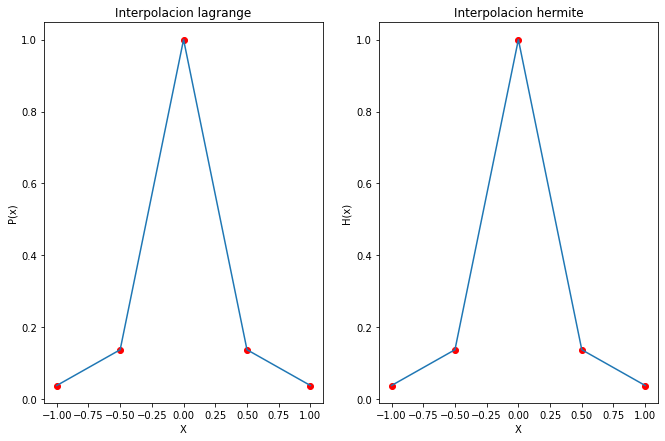

In [179]:
# Lagrange, Hermite 
n = 4
f_s = lambda x: 1/(1+25*x**2)
def funcion_lagrange(f_s,n):
  x = np.linspace(-1,1,n)
  poly = lagrange(x,f_s(x))
  return f_s(x), poly(x), x


func1, poly1, x = funcion_lagrange(f_s,n+1)

def funcion_hermite(f_s, n):
  x = np.linspace(-1,1,n)
  poly = np.polynomial.hermite.Hermite.fit(x,f_s(x),n-1)

  return f_s(x), poly(x)

func2, poly2 = funcion_hermite(f_s,n+1)

#gráfica lagrange
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.plot(x, func1,'ro')
plt.plot(x,poly1)
plt.title('Interpolacion lagrange')
plt.xlabel('X')
plt.ylabel('P(x)')

#gráfica hermite
plt.subplot(1,2,2)
plt.plot(x, func2,'ro')
plt.plot(x,poly2)
plt.title('Interpolacion hermite')
plt.xlabel('X')
plt.ylabel('H(x)')

In [230]:
#calculando el error
z = sp.symbols("x") # x será una variable simbólica

# print(sp.diff(f_s(z),z, 5))
f5 = sp.diff(f_s(z),z, 5)
fxn5 = sp.lambdify(z,f5,'numpy')
dicc_lagrange = {'x': x,'f5': fxn5(x)}
df_lagrange = pd.DataFrame(dicc_lagrange)
print('el máximo de la quinta dericada de f en [-1,1] es = ', str(df_lagrange.x.max()),',', str( df_lagrange.f5.max()))
#definiendo la productoria
x_ = None
productoria = []
producto = None
for i in range(len(x)):
  x_ = 0.5 -x[i]
  productoria.append(x_)

print(productoria)
producto = np.prod(np.array(productoria)) 

abs(df_lagrange.f5.max() /np.math.factorial(n+1) * producto)
#no sé como hacer esta parte ya que si tomamos el punto en  0.5 siempre da 0
#pues 0.5 también está en el intervalo de interpolación [-1,1] al dividirlo en n pasos
#lo que se según la formula resultaría en un factor (x - xi) = (0.5 - 0.5) = 0 que multiplica al numerador 
print('''
      
''', df_lagrange.x)

el máximo de la quinta dericada de f en [-1,1] es =  1.0 , 744.8262103361618
[1.5, 1.0, 0.5, 0.0, -0.5]

      
 0   -1.0
1   -0.5
2    0.0
3    0.5
4    1.0
Name: x, dtype: float64


Text(0, 0.5, 'H(x)')

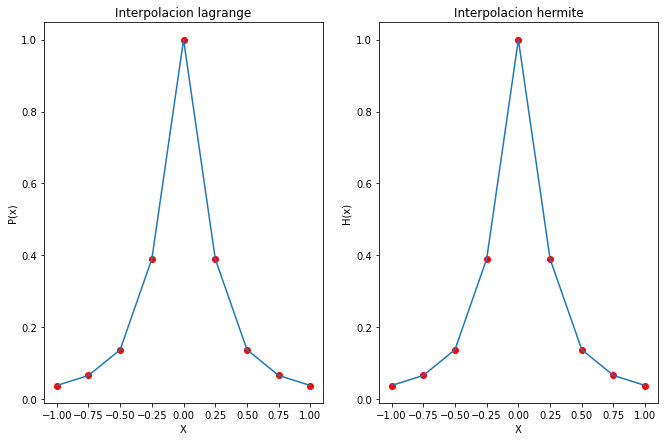

In [119]:
n = 8
def funcion_lagrange(f_s,n):
  x = np.linspace(-1,1,n)
  poly = lagrange(x,f_s(x))
  return f_s(x), poly(x), x

func1, poly1, x = funcion_lagrange(f_s,n+1)

def funcion_hermite(f_s, n):
  x = np.linspace(-1,1,n)
  poly = np.polynomial.hermite.Hermite.fit(x,f_s(x),n-1)

  return f_s(x), poly(x)

func2, poly2 = funcion_hermite(f_s,n+1)

#gráfica lagrange
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.plot(x, func1,'ro')
plt.plot(x,poly1)
plt.title('Interpolacion lagrange')
plt.xlabel('X')
plt.ylabel('P(x)')

#gráfica hermite
plt.subplot(1,2,2)
plt.plot(x, func2,'ro')
plt.plot(x,poly2)
plt.title('Interpolacion hermite')
plt.xlabel('X')
plt.ylabel('H(x)')

Text(0, 0.5, 'H(x)')

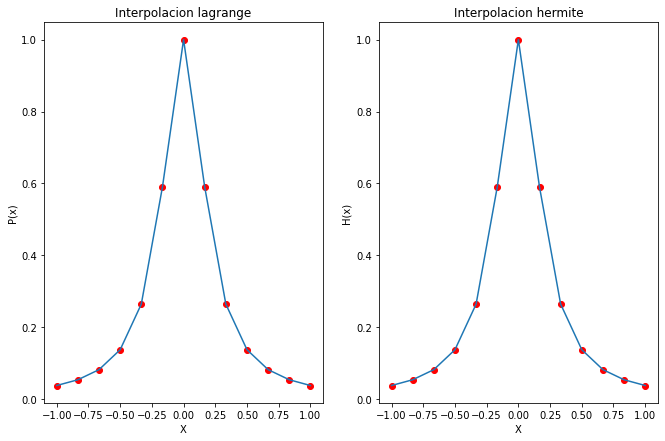

In [120]:
n = 12
def funcion_lagrange(f_s,n):
  x = np.linspace(-1,1,n)
  poly = lagrange(x,f_s(x))
  return f_s(x), poly(x), x

func1, poly1, x = funcion_lagrange(f_s,n+1)

def funcion_hermite(f_s, n):
  x = np.linspace(-1,1,n)
  poly = np.polynomial.hermite.Hermite.fit(x,f_s(x),n-1)

  return f_s(x), poly(x)

func2, poly2 = funcion_hermite(f_s,n+1)

#gráfica lagrange
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.plot(x, func1,'ro')
plt.plot(x,poly1)
plt.title('Interpolacion lagrange')
plt.xlabel('X')
plt.ylabel('P(x)')

#gráfica hermite
plt.subplot(1,2,2)
plt.plot(x, func2,'ro')
plt.plot(x,poly2)
plt.title('Interpolacion hermite')
plt.xlabel('X')
plt.ylabel('H(x)')

Text(0, 0.5, 'H(x)')

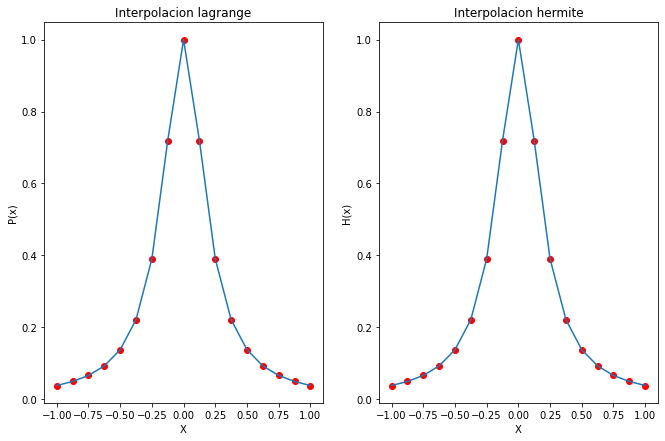

In [121]:
n = 16
def funcion_lagrange(f_s,n):
  x = np.linspace(-1,1,n)
  poly = lagrange(x,f_s(x))
  return f_s(x), poly(x), x

func1, poly1, x = funcion_lagrange(f_s,n+1)

def funcion_hermite(f_s, n):
  x = np.linspace(-1,1,n)
  poly = np.polynomial.hermite.Hermite.fit(x,f_s(x),n-1)

  return f_s(x), poly(x)

func2, poly2 = funcion_hermite(f_s,n+1)

#gráfica lagrange
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.plot(x, func1,'ro')
plt.plot(x,poly1)
plt.title('Interpolacion lagrange')
plt.xlabel('X')
plt.ylabel('P(x)')

#gráfica hermite
plt.subplot(1,2,2)
plt.plot(x, func2,'ro')
plt.plot(x,poly2)
plt.title('Interpolacion hermite')
plt.xlabel('X')
plt.ylabel('H(x)')

/usr/local/lib/python3.7/dist-packages/numpy/polynomial/hermite.py:1403: RankWarning: The fit may be poorly conditioned
  return pu._fit(hermvander, x, y, deg, rcond, full, w)


Text(0, 0.5, 'H(x)')

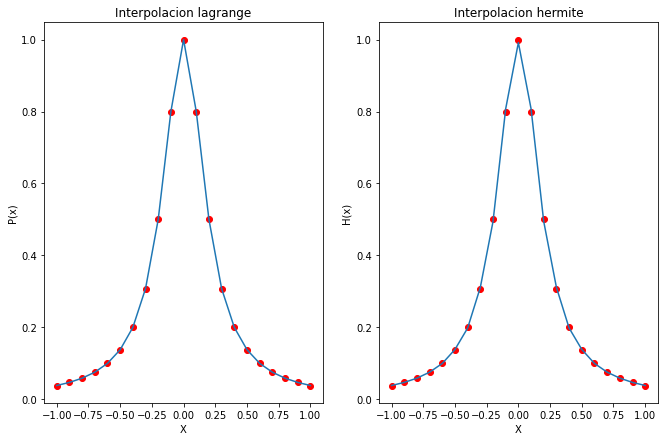

In [122]:
n = 20
def funcion_lagrange(f_s,n):
  x = np.linspace(-1,1,n)
  poly = lagrange(x,f_s(x))
  return f_s(x), poly(x), x

func1, poly1, x = funcion_lagrange(f_s,n+1)

def funcion_hermite(f_s, n):
  x = np.linspace(-1,1,n)
  poly = np.polynomial.hermite.Hermite.fit(x,f_s(x),n-1)

  return f_s(x), poly(x)

func2, poly2 = funcion_hermite(f_s,n+1)

#gráfica lagrange
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.plot(x, func1,'ro')
plt.plot(x,poly1)
plt.title('Interpolacion lagrange')
plt.xlabel('X')
plt.ylabel('P(x)')

#gráfica hermite
plt.subplot(1,2,2)
plt.plot(x, func2,'ro')
plt.plot(x,poly2)
plt.title('Interpolacion hermite')
plt.xlabel('X')
plt.ylabel('H(x)')

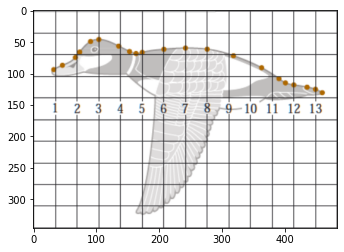

In [ ]:
#4
import cv2
img = cv2.imread('/content/drive/MyDrive/Métodos computacionales/Screenshot_5.png')
plt.imshow(img,aspect='1')
# plt.imshow?

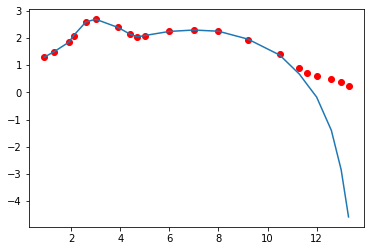

In [151]:
x = [0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3]
y = [1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25]

dicc = {'X': x, 'Y': y}
df_p = pd.DataFrame(dicc) 
poly = lagrange(df_p.X,df_p.Y)
plt.plot(df_p.X, df_p.Y,'ro')
plt.plot(df_p.X,poly(df_p.X))

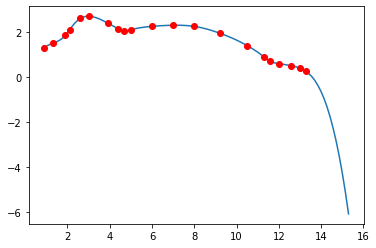

In [152]:
pol = CubicSpline(df_p.X,df_p.Y)
xdom = np.linspace(df_p.X.min(),df_p.X.max()+2.0,100)
plt.plot(xdom,pol(xdom))
plt.plot(df_p.X, df_p.Y,'ro')